# 2.8.2. Tensiones y direcciones principales en tres dimensiones

|Quién | Correo | Fecha | Qué hizo |
| ---  | ---    | ---   | ---      |
|Michael Heredia Pérez | <mherediap@unal.edu.co> | 2022-07-14 | Conversión de código de MAXIMA a Python|
|Diego Andrés Alvarez | <daalvarez@unal.edu.co>  | 2022-09-13 | Método alterno para calcular el polinomio característico |
|Juan Nicolás Ramírez | <jnramirezg@unal.edu.co> | 2022-09-17 | Adecuando y simplificando código |
|Diego Andrés Alvarez | <daalvarez@unal.edu.co>  | 2024-02-22 | Mejorando los comentarios |

$$
\newcommand{\ve}[1]{{\vec{\boldsymbol{#1}}}}
\newcommand{\ma}[1]{{\boldsymbol{#1}}}
\newcommand{\hve}[1]{{\,\hat{\!\boldsymbol{#1}}}}
\newcommand{\tr}{\operatorname{tr}}
$$

Importamos de la librería ```sympy``` algunas funciones que se usarán en este programa:

In [1]:
from sympy import init_printing, latex, symbols, Matrix, eye, det, simplify, Trace, factor, expand

# Para imprimir bonito
init_printing()
from IPython.display import Math                 
def imprimir (texto1, variable, texto2=""):
    return Math(texto1 +  rf'{latex(variable)}' + texto2)

Definimos las variables simbólicas necesarias, empleando la notación de $\LaTeX$:

In [2]:
sx,   sy,  sz = symbols("sigma_x sigma_y sigma_z")
txy, txz, tyz = symbols("tau_xy tau_xz tau_yz")
sn = symbols("sigma_n")

Definimos la matriz de tensiones en coordenadas rectangulares:

$$
\ma{\sigma} = 
\begin{pmatrix}
\sigma_{x} & \tau_{xy} & \tau_{xz}\\
\tau_{xy} & \sigma_{y} & \tau_{yz}\\
\tau_{xz} & \tau_{yz} & \sigma_{z}
\end{pmatrix}
$$

In [3]:
sigma = Matrix([[ sx, txy, txz],
                [txy,  sy, tyz],
                [txz, tyz,  sz]])

Mediante la función ```charpoly``` de ```sympy``` calculamos el polinomio característico de la matriz $\ma{\sigma}$ en función de $\sigma_n$, la variable ```sn```. Debido a la definición del coeficiente de $\sigma_n^3$ como negativo, se cambia el signo de toda la ecuación para que coincidan:  

In [18]:
polinomcar = -sigma.charpoly(sn)
polinomcar

La función ```as_expr()``` de ```sympy``` tiene la finalidad de convertir a expresión simbólica operable. así:

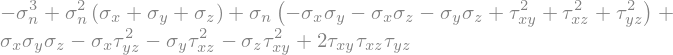

In [5]:
poli_car_1 = polinomcar.as_expr()
poli_car_1

Por otro lado, observemos que el polinomio característico de $\ma{\sigma}$ también se puede obtener mediante:

$$\det(\ma{\sigma} - \sigma_n \ma{I}) = 0$$

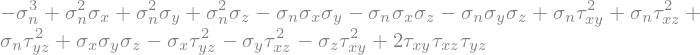

In [6]:
I = eye(3)                       # matriz identidad 3x3
poli_car_2 = det(sigma - sn*I)
poli_car_2

Almacenamos los polinomios característicos de $\ma{\sigma}$ calculados por ambos métodos en las variables ```poli_car_1``` y ```poli_car_2```. Ambas variables deben contener la misma información. Por lo tanto, ```poli_car_1 - poli_car_2``` = 0. Comprobamos, usando adicionalmente el comando ```sympy.expand()```:

In [7]:
expand(poli_car_1 - poli_car_2)

Con el método ```all_coeff()``` extraemos los coeficientes del polinomio característico de $\ma{\sigma}$:

$$-\sigma_n^3+I_1\sigma_n^2-I_2\sigma_n+I_3 = 0$$

In [8]:
invar = polinomcar.all_coeffs()

In [9]:
invar

Estos coeficientes son los invariantes de esfuerzos. Los extraemos a continuación, teniendo en cuenta que ya garantizamos previamente que el coeficiente de $\sigma_n^3$ fuera -1.

In [10]:
I0 =  invar[0]
I1 =  invar[1]
I2 = -invar[2]  # Cuidado con este signo negativo.
I3 =  invar[3]

In [11]:
imprimir("I_0 = ", I0)

<IPython.core.display.Math object>

In [12]:
imprimir("I_1 = ", I1)

<IPython.core.display.Math object>

In [13]:
imprimir("I_2 = ", I2)

<IPython.core.display.Math object>

In [14]:
imprimir("I_3 = ", I3)

<IPython.core.display.Math object>

Dado el polinomio característico

$$-\sigma_n^3+I_1\sigma_n^2-I_2\sigma_n+I_3 = 0$$

sus coeficientes (invariantes de esfuerzo) son:

$I_1=\tr(\ma{\sigma})$ (<font color='blue'>1</font>)

$I_2=\frac{1}{2}(\tr(\ma{\sigma})^2-\tr(\ma{\sigma}^2))$ (<font color='blue'>2</font>)

$I_3 = \det(\ma{\sigma})$ (<font color='blue'>3</font>)


Verificamos las igualdades (<font color='blue'>1</font>), (<font color='blue'>2</font>) y (<font color='blue'>3</font>). Por lo que cada línea debe imprimir cero; aquí el comando ```sympy.Trace()``` calcula la traza de la matriz dada. 

$I_1 - \tr(\ma{\sigma}) = 0$

In [15]:
simplify(I1 - Trace(sigma))    # Si no se simplifica deja indicada la operación traza.

$I_2 - \frac{1}{2}(\tr(\ma{\sigma})^2-\tr(\ma{\sigma}^2)) = 0$

In [16]:
expand(simplify(I2 - (Trace(sigma)**2 - Trace(sigma**2))/2))

$I_3 - \det(\ma{\sigma})=0$

In [17]:
I3 - det(sigma)